# Insurance Premium Code

### Import Librarys

In [ ]:
!pip install lmoments

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
import calendar
import datetime
from datetime import date
import lmoments
import statistics
from scipy import stats

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

df=pd.read_csv('/content/drive/MyDrive/seriessinteticas (1).csv',sep=',')
df['Datetime']=pd.to_datetime(df['timestamp.1'])
df=df.set_index(['Datetime'])
df.head()

In [14]:
##Acumula 730 dias de chuva diárias
df2 = df.rolling('730d').sum()
df2.head()
#df2.describe()

<ipython-input-14-cc79c1c66908>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['timestamp.1'], dtype='object')
  df2 = df.rolling('730d').sum()


,Precip,r1.1,r2.1,r3.1,r4.1,r5.1,r6.1,r7.1,r8.1,r9.1,...,r91.1,r92.1,r93.1,r94.1,r95.1,r96.1,r97.1,r98.1,r99.1,r100.1
Datetime,,,,,,,,,,,,,,,,,,,,,
1983-01-01,14.0,0.0,0.000000,0.0,1.169786,0.000000,0.000000,0.984089,5.278412,0.0,...,0.000000,7.342964,0.00000,14.567294,0.0,11.944187,10.153199,7.149715,0.0,0.0
1983-01-02,14.0,0.0,0.000000,0.0,1.169786,1.643399,0.423119,1.995887,5.278412,0.0,...,0.000000,7.342964,0.00000,18.725670,0.0,11.944187,21.410064,8.080039,0.0,0.0
1983-01-03,14.0,0.0,8.707160,0.0,1.169786,1.643399,0.423119,1.995887,7.212215,0.0,...,0.200432,7.342964,0.00000,26.625157,0.0,11.944187,22.871934,19.870997,0.0,0.0
1983-01-04,14.0,0.0,8.707160,0.0,1.169786,1.643399,0.423119,1.995887,7.212215,0.0,...,4.199803,7.342964,0.00000,27.065741,0.0,13.066138,22.871934,20.228737,0.0,0.0
1983-01-05,14.0,0.0,17.970561,0.0,1.169786,1.643399,0.423119,7.505472,7.212215,0.0,...,18.426437,11.935294,30.57971,36.082585,0.0,19.806086,22.871934,29.804163,0.0,0.0


### Read data

In [ ]:
df=pd.read_csv('C:/Users/User/Downloads/JaguariData/seriessinteticas.csv',sep=',')
df['Datetime']=pd.to_datetime(df['timestamp.1'])
df=df.set_index(['Datetime'])
#df.head()

In [ ]:
##Acumula 730 dias de chuva diárias
df2 = df.rolling('730d').sum()
df2.to_csv(r'C:/Users/User/Downloads/JaguariData/P24-daily.csv', sep=',')
#df2.head()
#df2.describe()

### Define Threshold

In [15]:
##define função (2424 mm é o threshold).
## 77522.65 é valor em R$ de perdas por dia - definido abaixo do theshold (seca), e 0 acima do threshold (situação normal)
def filter (df2,columnname):
    df2.loc[df2[columnname]<=2424,columnname+'_'+'diff']=775229.65 
    df2.loc[df2[columnname]>2424,columnname+'_'+'diff']=0

In [16]:
##Calculo da função em todas as colunas c
columnname = df2.columns
for c in columnname:
    filter(df2,c)
    #print(filter)

<ipython-input-15-1a188aa1b6dd>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2.loc[df2[columnname]<=2424,columnname+'_'+'diff']=775229.65
<ipython-input-15-1a188aa1b6dd>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2.loc[df2[columnname]<=2424,columnname+'_'+'diff']=775229.65


In [17]:
##Salva apenas as colunas novas com o sufixo 'diff'
drycolumns=df2.filter(regex='diff')

dry=drycolumns.loc['1985-01-01':'2013-12-31'] #descartamos os primeiros 2 anos - devido ao índice ser acumulado de 730 dias 
#dry.to_csv(r'C:/Users/User/Downloads/JaguariData/payoffdaily.csv', sep=',', columns=drycolumns)

In [18]:
## Calculo do payoff anual - Acumular os pagamentos anuais
payoffannual=dry.resample('Y').sum()
#payoffannual.to_csv(r'C:/Users/User/Downloads/JaguariData/payoffannual.csv', sep=',')
payoffannual.head()

,Precip_diff,r1.1_diff,r2.1_diff,r3.1_diff,r4.1_diff,r5.1_diff,r6.1_diff,r7.1_diff,r8.1_diff,r9.1_diff,...,r91.1_diff,r92.1_diff,r93.1_diff,r94.1_diff,r95.1_diff,r96.1_diff,r97.1_diff,r98.1_diff,r99.1_diff,r100.1_diff
Datetime,,,,,,,,,,,,,,,,,,,,,
1985-12-31,0.0,0.0,1.131835e+08,9302755.80,0.000000e+00,0.0,8.450003e+07,8.139911e+07,0.0,0.00,...,93027558.00,0.0,0.00,0.0,0.0,89151409.75,0.0,0.00,0.000000e+00,8.450003e+07
1986-12-31,0.0,0.0,2.829588e+08,0.00,3.798625e+07,94578017.3,1.721010e+08,2.697799e+08,0.0,0.00,...,72096357.45,0.0,19380741.25,0.0,0.0,37986252.85,0.0,0.00,9.922940e+07,2.325689e+08
1987-12-31,0.0,0.0,1.209358e+08,42637630.75,2.581515e+08,99229395.2,7.752297e+05,1.031055e+08,0.0,6977066.85,...,0.00,0.0,69770668.50,0.0,0.0,31009186.00,0.0,18605511.60,1.031055e+08,4.418809e+07
1988-12-31,0.0,0.0,0.000000e+00,0.00,3.876148e+06,0.0,0.000000e+00,0.000000e+00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,10077985.45,0.0,3876148.25,0.000000e+00,0.000000e+00
1989-12-31,0.0,0.0,2.325689e+06,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.0,52715616.20,0.0,0.00,0.000000e+00,0.000000e+00


In [19]:
#definir função payoff máximo anual
Max=282958820.64 #12 meses
#Max=139541336.21 #6 meses
# Max=69770668.10 #3 meses

def maxpayoff(payoff,columnname):
    payoff.loc[payoff[columnname]>=Max,columnname]=Max
    payoff.loc[payoff[columnname]<Max,columnname]

In [20]:
##calcular e salvar payoff máximo anual
columnname = payoffannual.columns
for c in columnname:
    maxpay=maxpayoff(payoffannual,c)
#payoffannual.to_csv(r'C:/Users/User/Downloads/JaguariData/payofftotal_3M.csv', sep=',', columns=maxpay)

In [22]:
#Definir função mediana e quantile dos payoffs
def histograma(payoff,columnname):
    return np.histogram(payoff[columnname])
# payoff.hist(column=c)

def median(histogram):
    return np.median(histogram)
    
def quantile(histogram):
    return np.quantile(histogram,0.05)

In [23]:
#calculo do histograma
columnname = payoffannual.columns
payoff_histograma=[]
for c in columnname:
    payoff_hist=histograma(payoffannual,c)#[1]
    payoff_histograma.append(payoff_hist)
    #plt.hist(payoff_histograma)
    #plt.show()

In [ ]:
#calculo da mediana e Quantil 95
payoff_mediana=[]
payoff_quantil=[]
for i in range(len(payoff_histograma)):
    payoff_median=median(payoff_histograma[i])
    payoff_mediana.append(payoff_median)
    payoff_quant=quantile(payoff_histograma[i])
    payoff_quantil.append(payoff_quant)

In [ ]:
#salvando os resultados
dict_median={'mediana': payoff_mediana, 'Q05':payoff_quantil}
premium= pd.DataFrame(dict_median)
premium.to_csv(r'C:/Users/User/Downloads/JaguariData/premium_3M.csv', sep=',')

## <b>Testes
* Normality teste
* Transform a non-normal distribution to a Gaussian distribution
* CDF, PDF, lognormal distribution

In [26]:
#Transform a non-normal distribution to a Gaussian distribution
from scipy.stats import rankdata
x= df2
y=(rankdata(x)/1850)-1
#print(np.min(y),np.max(y))
y=np.arctanh(y)

<ipython-input-26-15fc1729198f>:6: RuntimeWarning: invalid value encountered in arctanh
  y=np.arctanh(y)


In [ ]:
#Plot non-normal distribution to a Gaussian distribution
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(x)
ax[0,0].set_title('Original data')
ax[0,1].plot(y)
ax[0,1].set_title('transformed data')
ax[1,0].hist(x,bins=10)
ax[1,0].set_title('Original data')
ax[1,1].hist(y,bins=10)
ax[1,1].set_title('Transformed data')

plt.show()

In [ ]:
##Calcular a mediana do payoff máximo anual, variancia e 95%percentil
mediana=df.median()
mean=df.mean()
std=df.std()
variancia=np.var(df)
P95=np.percentile(df,95)
#mean.to_csv(r'C:/Users/User/Downloads/JaguariData/meanpayoff.csv', sep=',')
#std.to_csv(r'C:/Users/User/Downloads/JaguariData/Stdpayoff.csv', sep=',')

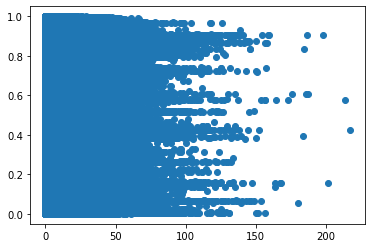

In [ ]:
# Compute ecdf
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
# # get cumulative probability for values
# print('P(x<20): %.3f' % ecdf(20))
# print('P(x<40): %.3f' % ecdf(40))
# print('P(x<60): %.3f' % ecdf(60))
# # plot the cdf
x,y = ecdf(df)
plt.scatter(x=x, y=y)

In [29]:
#calculate Cdf, pdf 
from numpy.random import normal
from scipy.stats import norm
from scipy.stats import lognorm
cdf=norm.cdf(df,mean,std)
pdf=norm.pdf(df,mean,std)
lognorm=lognorm.pdf(df,mean,std)
plt.plot(pdf)
plt.show()

ValueError: ignored

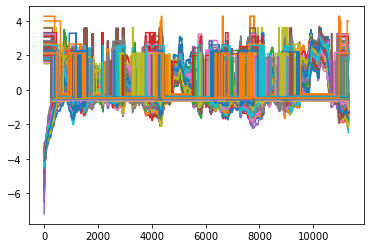

In [30]:
#transfor to normal by yeo-johnson methods
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import numpy as np
from sklearn.preprocessing import PowerTransformer

data=df2
pt = PowerTransformer(method='yeo-johnson')
pt.fit(data)
transformed_data = pt.transform(data)
plt.plot(transformed_data)
plt.show()

In [31]:
##Teste com somente 1 distrubuição
payoffannual_obs=pd.read_csv('C:/Users/User/Downloads/JaguariData/Dry_obs.csv',sep=',', index_col=0)

mediana=payoffannual_obs.median()
mean=payoffannual_obs.mean()
std=payoffannual_obs.std()
variancia=np.var(payoffannual_obs)

# #calculate Cdf, pdf 
from numpy.random import normal
from scipy.stats import norm
from scipy.stats import lognorm
#cdf=norm.cdf(payoffannual_obs, mean, std)
pdf=norm.pdf(payoffannual_obs,mean,std)
# lognorm=lognorm.pdf(payoffannual_obs,mean,std)
plt.plot(pdf)
plt.show()

FileNotFoundError: ignored

In [ ]:

## Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(payoffannual_obs)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

##  D’Agostino’s K^2 test   
from scipy.stats import normaltest
# normality test
stat, p = normaltest(payoffannual_obs)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

    

Statistics=0.282, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=66.504, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
#Transform a non-normal distribution to a Gaussian distribution
from scipy.stats import rankdata
x=payoffannual_obs
y=(rankdata(x)/1850)-1
#print(np.min(y),np.max(y))
y=np.arctanh(y)

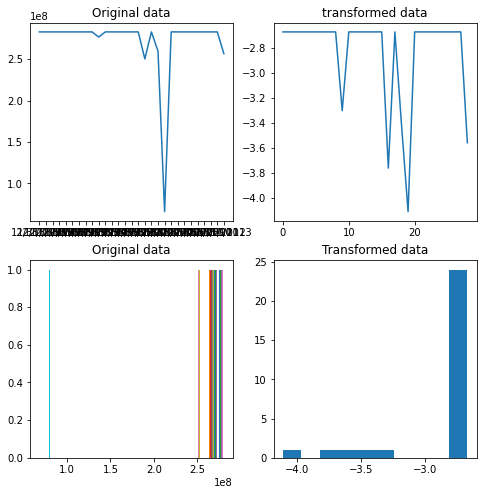

In [ ]:
#Plot non-normal distribution to a Gaussian distribution
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax[0,0].plot(x)
ax[0,0].set_title('Original data')
ax[0,1].plot(y)
ax[0,1].set_title('transformed data')
ax[1,0].hist(x,bins=10)
ax[1,0].set_title('Original data')
ax[1,1].hist(y,bins=10)
ax[1,1].set_title('Transformed data')

plt.show()

In [ ]:
##Calcular a mediana do payoff máximo anual, variancia e 95%percentil
drypreci=df2['Precip']
mediana=drypreci.median()
mean=drypreci.mean()
std=drypreci.std()
variancia=np.var(dry)
P95=np.percentile(dry,95)

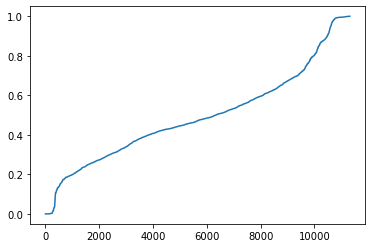

In [ ]:
#calculate Cdf, pdf 
from numpy.random import normal
from scipy.stats import norm
from scipy.stats import lognorm

data_sorted = np.sort(drypreci)

cdf=norm.cdf(data_sorted,mean,std)
pdf=norm.pdf(drypreci,mean,std)
lognorm=lognorm.pdf(drypreci,mean,std)
plt.plot(cdf)
plt.show()

In [ ]:
obs=df['Precip']

## Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(obs)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

##  D’Agostino’s K^2 test   
from scipy.stats import normaltest
# normality test
stat, p = normaltest(obs)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.482, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=9264.776, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\User\anaconda3\envs\geopandas_env\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


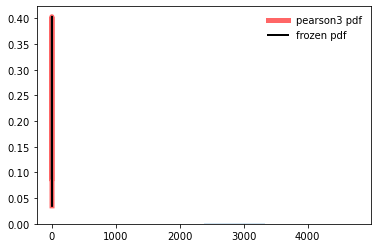

In [ ]:
from scipy.stats import pearson3
import matplotlib.pyplot as plt
from scipy.stats import skew

dryprec=df2['Precip']
#drypreci = np.sort(dryprec)

fig, ax = plt.subplots(1, 1)
skew =skew(drypreci)
mean = drypreci.mean()
var=np.var(drypreci)

mean, var, skew, kurt = pearson3.stats(skew, moments='mvsk')
x = np.linspace(pearson3.ppf(0.01, skew),
                pearson3.ppf(0.95, skew), 100)
ax.plot(x, pearson3.pdf(x, skew),
       'r-', lw=5, alpha=0.6, label='pearson3 pdf')
rv = pearson3(skew)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = pearson3.ppf([0.001, 0.5, 0.999], skew)
np.allclose([0.001, 0.5, 0.999], pearson3.cdf(vals, skew))
True
ax.hist(drypreci, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()